# Plot PDDs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd

In [88]:
data_path = '/Users/raineyaberle/Research/Hubbard/weather/'
data_fn = 'compiled_weather_data_PDDs.csv'
data = pd.read_csv(os.path.join(data_path, data_fn), index_col=0)
data.index = pd.DatetimeIndex(data.index)

# Add water year column
data['water_year'] = [x.year+1 if x.month >= 10 else x.year for x in data.index]

# Add cumulative PDDs and precip
cols = [x for x in list(data.columns) if x!='water_year']
for col in cols:
    # data[col+'_cumsum'] = data.groupby('water_year')[col].cumsum()
    data[col+'_cumsum'] = data.groupby(data.index.year)[col].cumsum()

data

,AirTempC_Haenke1,AirTempC_Haenke2,AirTempC_Yakutat,Precip_Yakutat,PDD_Haenke1,PDD_Haenke2,PDD_Yakutat,water_year,AirTempC_Haenke1_cumsum,AirTempC_Haenke2_cumsum,AirTempC_Yakutat_cumsum,Precip_Yakutat_cumsum,PDD_Haenke1_cumsum,PDD_Haenke2_cumsum,PDD_Yakutat_cumsum
2002-11-06,NaN,NaN,8.674359,0.001524,NaN,NaN,8.674359,2003,NaN,NaN,8.674359,0.001524,NaN,NaN,8.674359
2002-11-07,NaN,NaN,2.897826,0.006096,NaN,NaN,2.897826,2003,NaN,NaN,11.572185,0.007620,NaN,NaN,11.572185
2002-11-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-11-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-11-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-07,2.846875,2.377083,NaN,NaN,2.846875,2.377083,NaN,2023,16.210417,13.126042,NaN,NaN,16.210417,13.126042,NaN
2023-05-08,3.032292,2.569792,NaN,NaN,3.032292,2.569792,NaN,2023,19.242708,15.695833,NaN,NaN,19.242708,15.695833,NaN
2023-05-09,3.741667,3.251042,NaN,NaN,3.741667,3.251042,NaN,2023,22.984375,18.946875,NaN,NaN,22.984375,18.946875,NaN
2023-05-10,5.865625,5.441667,NaN,NaN,5.865625,5.441667,NaN,2023,28.850000,24.388542,NaN,NaN,28.850000,24.388542,NaN


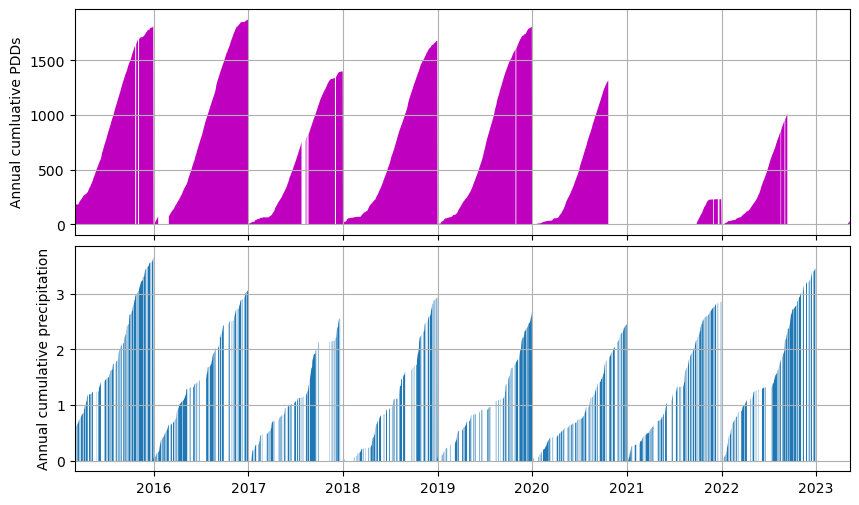

In [95]:
fig, ax = plt.subplots(2, 1, figsize=(10,6), sharex=True)
markersize=2
ax[0].fill_between(data.index, data['PDD_Haenke1_cumsum'], np.zeros(len(data.index)),
                  facecolor='m')
ax[0].grid()
ax[0].set_ylabel('Annual cumluative PDDs')
ax[0].set_xlim(data.index[4500], data.index[-1])
ax[1].fill_between(data.index, data['Precip_Yakutat_cumsum'], np.zeros(len(data.index)))
ax[1].set_ylabel('Annual cumulative precipitation')
ax[1].grid()

fig.subplots_adjust(hspace=0.05)
plt.show()

In [62]:
def mov_mean(x, window=10):
    return np.convolve(x, np.ones(window)/window, mode='same')

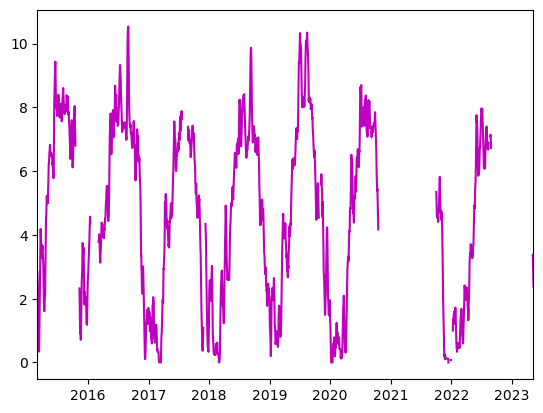

In [71]:
# plt.plot(data.index, data['PDD_Haenke1'], '.m', markersize=markersize)
plt.plot(data.index, mov_mean(data['PDD_Haenke1'].values), '-m', markersize=markersize)
plt.xlim(data.index[4500], data.index[-1])
plt.show()